# Colorado Air Monitoring Mobile Lab (CAMML) Data Analysis

## Uploading Data
Data is from the Colorado Department of Public Health and Environment (CDPHE) and was taken in Broomfield Colorado during an extraction at the Livingston Pad. Data was taken during 5 different periods: 1) Baseline, 2) Drilling, 3) Hydraulic Fracturing, 4) Mill Out, and 5) Flowback/Production. These periods of obeservation were taken during 2019 and 2020. However, the data is not consistent and therefore seasonal trends are difficult to assess.


https://www.colorado.gov/airquality/tech_doc_repository.aspx#camml_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from CAMMLclass import CAMML_class

In [2]:
camml = CAMML_class(os.getcwd() + '\Data\Extraction_Livingston_Data', os.getcwd() + '\Data')
camml.flow()

CAMML upload started
running flow
finished camml_clean
finished VOC flags
avgeraging other finished
starting unc_func
done!


## Data Analysis

There are three datasets within this analysis, a strictly VOC dataset, an "other" dataset which contains ozone, particulate mater, nitrogen oxide gas, methane, and meteorological data, and a merged dataset. VOC data was taken hourly, while the other data was taken every minute. Data in the merged dataset has been averaged to hourly data by taking the mean concentration of other data between the sampling periods of the VOC data.

In [3]:
camml.merged_data.head()

,StartTime,EndTime,ethane,propane,isobutane,n-butane,cyclopentane,isopentane,n-pentane,isoprene,...,sheet,WindDirection,PM2.5,PM10,CH4,NO,NO2,NOx,O3,PM2.510
midtime,,,,,,,,,,,,,,,,,,,,,
2019-06-04 14:21:30,2019-06-04 13:59:00,2019-06-04 14:44:00,5.90838,2.646260,0.501721,1.241240,0.046314,0.430530,0.432279,0.099759,...,Baseline,234.724444,3.937778,10.868889,1.939222,0.015000,2.822844,2.578044,64.780022,6.931111
2019-06-04 15:23:30,2019-06-04 15:01:00,2019-06-04 15:46:00,2.26383,0.833317,0.169315,0.431305,0.030604,0.236327,0.190063,0.091367,...,Baseline,234.724444,3.937778,10.868889,1.939222,0.015000,2.822844,2.578044,64.780022,6.931111
2019-06-04 16:25:30,2019-06-04 16:03:00,2019-06-04 16:48:00,4.78262,1.753110,0.335168,0.815708,0.035900,0.314633,0.277682,0.089538,...,Baseline,238.417778,4.224444,11.500000,1.957444,0.743022,3.188022,3.923200,66.242622,7.275556
2019-06-04 17:27:30,2019-06-04 17:05:00,2019-06-04 17:50:00,2.81914,1.045750,0.195280,0.478551,0.030280,0.244521,0.197030,0.100848,...,Baseline,134.335556,3.535556,8.608889,1.944222,0.104778,2.834178,2.938800,66.086333,5.073333
2019-06-04 18:29:30,2019-06-04 18:07:00,2019-06-04 18:52:00,4.98905,2.767920,0.549349,1.349220,0.051166,0.456397,0.493653,0.092530,...,Baseline,50.444444,3.280000,7.731111,1.980689,0.015000,3.576044,3.562200,63.158578,4.451111


### General Characteristics

Below is a correlation heatmap of all the compounds in the merged data. It is clear that the lighter alkanes are more correlated with eachother, while heavier alkanes are grouped closer together. It was found in this study that the drilling mud utilized by the extraction company used a lot of volatile heavy alkanes which will be discussed further below. The "other" compounds were found to not vary strongly with any oil and gas activity, rather they were more strongly influenced by urban activities

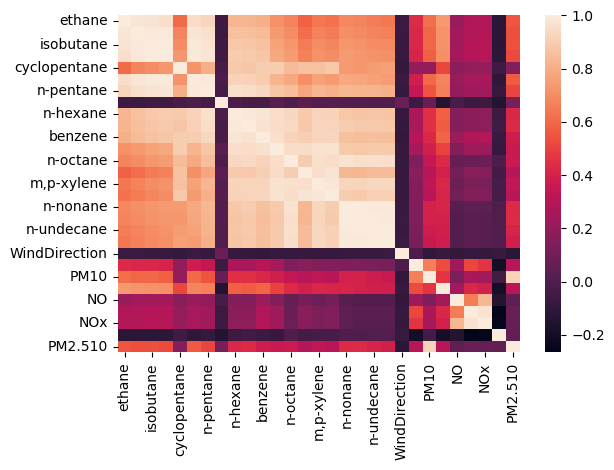

In [4]:
sns.heatmap(camml.merged_data.corr())
plt.rcParams['figure.figsize'] = [8, 8]
plt.tight_layout()

### Other Data

Several of the other data was strongly impacted by the dirunal cycle. Ozone peaked in the afternoon when the greatest amount of solar radiation was available. The particulate matter showed a large peak later in the afternoon. These graphs are the average of the entire observational period and can be broken down futher to find what this peak may be associated with.

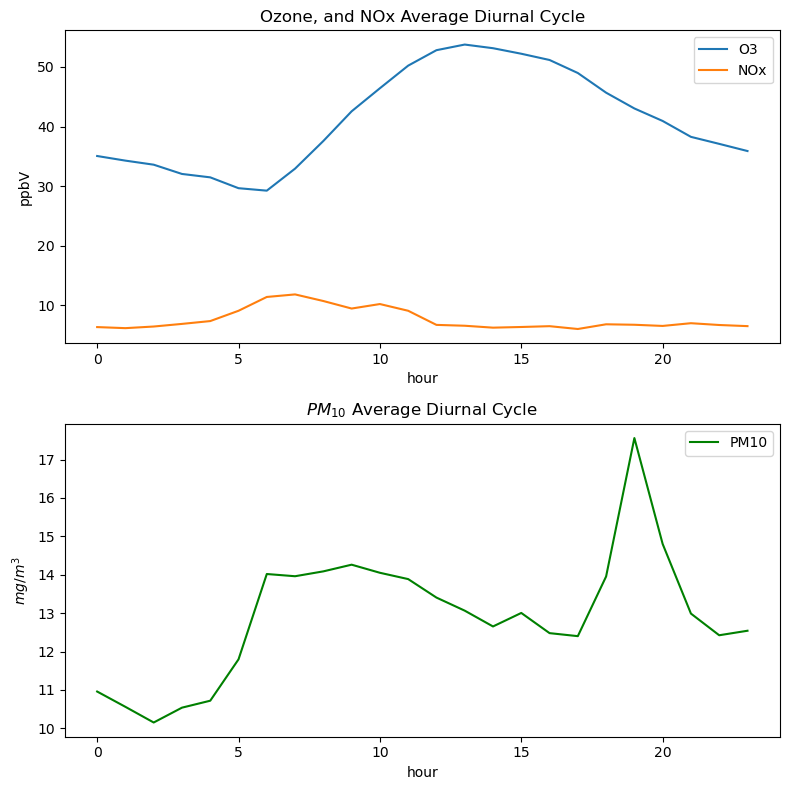

In [5]:
camml.other_data['hour'] = camml.other_data['StartTime'].dt.hour
ofig,oax = plt.subplots(nrows=2)
camml.other_data[['O3','NOx','hour']].groupby('hour').mean().plot(ax = oax[0])
oax[0].set_title('Ozone, and NOx Average Diurnal Cycle')
oax[0].set_ylabel('ppbV')

camml.other_data[['PM10','hour']].groupby('hour').mean().plot(ax = oax[1], c='g')
oax[1].set_ylabel('$mg/m^3$')
oax[1].set_title('$PM_{10}$ Average Diurnal Cycle')

plt.rcParams['figure.figsize'] = [10, 5]
plt.tight_layout()

From splitting up the data, we can see that this peak is associated with the drilling period. This may be due to increased truck traffic in the area during this time. 

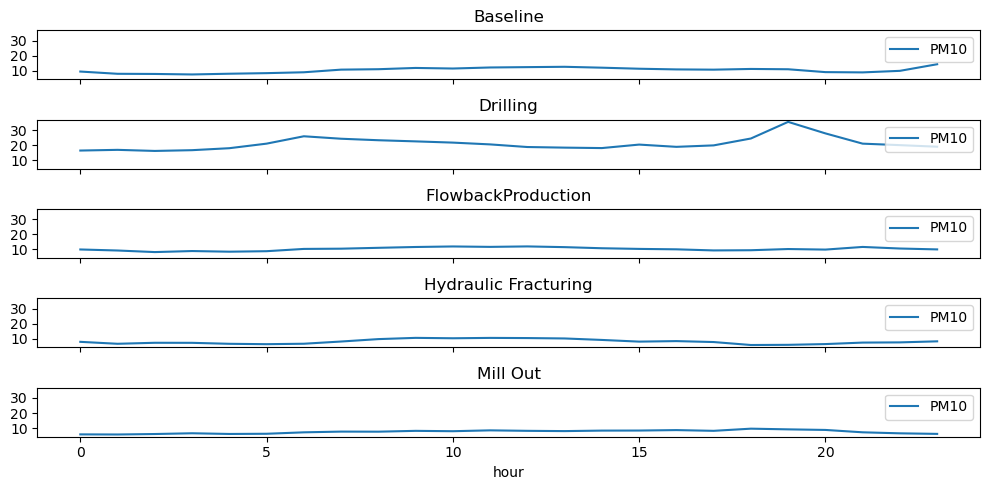

In [6]:
pmgroups = camml.other_data[['sheet','hour', 'PM10']].groupby('sheet')
pmfig,pmax = plt.subplots(nrows=len(camml.other_data['sheet'].unique()), sharex='all', sharey='all')

for group, x in zip(pmgroups, pmax.ravel()):
    group[1].groupby('hour').mean().plot(ax=x)
    x.set_title(group[0])

plt.rcParams['figure.figsize'] = [15, 10]
plt.tight_layout()

### VOC Data

VOC data is observed hourly. Oil and gas extraction tends to be associated with elevated alkanes and some aromatics. As mentioned previously, heavy alkanes were found to be associated with the drilling period due to the type of drilling mud used. In the boxplots below, we can see elevated concentrations of n-decane and n-octane during the drilling period. Benzene, an aromatic associated with oil and gas extraction also shows elevated concentrations above background during most of the observed extraction periods when compared to the baseline observations. 

In [ ]:
ax = camml.voc_data[['benzene_[ppbV]','n-decane_[ppbV]','n-octane_[ppbV]','sheet_name']].groupby('sheet_name').boxplot()
plt.tight_layout()
for a in ax:
    a.set_yscale('log')
    
ax['FlowbackProduction'].set_ylabel('ppbV')

The ratio of i-pentane to n-pentane has also been used extensively in the literature to help classify plumes from oil and gas origin with a ratio near 2 indicating combustion and a ratio below 1 indicating oil and gas activity. The ratio of toluene to benzene has also been used as an indicator, although the values are slightly more blurred.

In [ ]:
camml.voc_data.columns

In [ ]:
camml.voc_data['i/n'] = camml.voc_data['isopentane_[ppbV]'] / camml.voc_data['isopentane_[ppbV]']
camml.voc_data['t/b'] = camml.voc_data['toluene_[ppbV]'] / camml.voc_data['benzene_[ppbV]']



In [ ]:
camml.other_data.columns